In [1]:
import vaex
import vaex.jupyter
import numpy as np
import pylab as plt
import matplotlib.pyplot as plt
#import ipywidgets as widgets
#from ipywidgets import Checkbox, VBox, HBox
#import vaex
#import vaex.jupyter
#import numpy as np
#import pylab as plt

In [ ]:
df = vaex.example()

In [ ]:
selection = df.select(True)
@vaex.jupyter.interactive_selection(df)
def plot(*args, **kwargs):
    df.plot(df.x, df.y, what=np.log(vaex.stat.count()+1), selection=True)
    plt.show()

In [ ]:
df.select(df.x > 0)

In [ ]:
def display_radio():
    import ipywidgets as widgets
    radio = widgets.RadioButtons(
        options=['x > 2', 'y < 2', 'x > 2 & y < 2'],
        disabled=False
    )
    def handle(change):
        if change['name'] == 'index':
            if change.new==0:
                df.select(df.x > 2)
            elif change.new==1:
                df.select(df.y < 2)
            elif change.new==2:
                df.select((df.x > 2) & (df.y < 2))

    radio.observe(handle)
    display(radio)

In [ ]:
display_radio()

In [ ]:
#df.plot_widget(df.x, df.y, [])
#df.plot(df.x, df.y, f='log1p',figsize=(40,30))
#df.plot(df.x, df.y)

In [ ]:
### Imports for the navigation
from ipywidgets import Button, HBox, VBox
import ipywidgets as widgets

In [ ]:
### Added very simple navigation
def zoom_fun_gen(t):
    x, y = t
    def zoom_fun(b):
        global xlim_l
        global xlim_r
        global ylim_d
        global ylim_u
        x_d = xlim_r - xlim_l
        y_d = ylim_u - ylim_d
        x_diff = x_d/3
        y_diff = y_d/3
        xlim_l+=x*x_diff # 0, 1, 2
        xlim_r-=(2-x)*x_diff # 2, 1, 0
        ylim_d+=y*y_diff # 0, 1, 2
        ylim_u-=(2-y)*y_diff # 2, 1, 0
        df.select(df.x > 0)
    return zoom_fun

In [ ]:
xlim_l = -28
xlim_r = 28
ylim_d = -28
ylim_u = 28
dirs = ['zoom top left', 'zoom left', 'zoom bottom left', 
         'zoom top middle', 'zoom middle', 'zoom bottom middle',
         'zoom top right',  'zoom right',  'zoom bottom right']
dirs_n = [(0, 2), (0, 1), (0, 0), (1, 2), (1, 1), (1, 0), (2, 2), (2, 1), (2, 0)]
buttons = [Button(description=d) for d in dirs]
for i, b in enumerate(buttons):
    b.on_click(zoom_fun_gen(dirs_n[i]))

In [ ]:
def reset(change):
    global xlim_l
    global xlim_r
    global ylim_d
    global ylim_u
    xlim_l=-28
    xlim_r=28
    ylim_d = -28
    ylim_u = 28
    df.select(df.x > 0)
resetb = Button(description="reset")
resetb.on_click(reset)
percent_shift = .2
def left_move(change):
    global xlim_l
    global xlim_r
    x_d = xlim_r - xlim_l
    xlim_l-=percent_shift*x_d
    xlim_r-=percent_shift*x_d
    df.select(df.x > 0)
    
def right_move(change):
    global xlim_l
    global xlim_r
    x_d = xlim_r - xlim_l
    xlim_l+=percent_shift*x_d
    xlim_r+=percent_shift*x_d
    df.select(df.x > 0)
    
def up_move(change):
    global ylim_d
    global ylim_u
    y_d = ylim_u - ylim_d
    ylim_d+=percent_shift*y_d
    ylim_u+=percent_shift*y_d
    df.select(df.x > 0)
    
def down_move(change):
    global ylim_d
    global ylim_u
    y_d = ylim_u - ylim_d
    ylim_d-=percent_shift*y_d
    ylim_u-=percent_shift*y_d
    df.select(df.x > 0)

rightb = Button(description="right")
rightb.on_click(right_move)
leftb = Button(description="left")
leftb.on_click(left_move)
upb = Button(description="up")
upb.on_click(up_move)
downb = Button(description="down")
downb.on_click(down_move)

In [ ]:
left_col   = VBox([button for button in buttons[:3]])
middle_col = VBox([button for button in buttons[3:6]])
right_col  = VBox([button for button in buttons[6:]])

display(HBox([left_col, middle_col, right_col]))
display(resetb)
display(HBox([leftb, rightb, VBox([upb, downb])]))

In [ ]:
selection = df.select(True)
@vaex.jupyter.interactive_selection(df)
def plot(*args, **kwargs):
    df.plot(df.x, df.y, what=np.log(vaex.stat.count()+1), selection=False)
    plt.xlim(xlim_l, xlim_r)
    plt.ylim(ylim_d, ylim_u)
    plt.show()

In [7]:
vdf = vaex.open('trace.hdf5')

In [8]:
vdf

#,Access,Address,Tag
<i style='opacity: 0.6'>0</i>,4,0,0
<i style='opacity: 0.6'>1</i>,16,8,0
<i style='opacity: 0.6'>2</i>,16,16,0
<i style='opacity: 0.6'>3</i>,16,24,0
<i style='opacity: 0.6'>4</i>,16,32,0
...,...,...,...
"<i style='opacity: 0.6'>89,999,995</i>",16,160175960,1
"<i style='opacity: 0.6'>89,999,996</i>",32,79935960,0
"<i style='opacity: 0.6'>89,999,997</i>",16,160175968,1
"<i style='opacity: 0.6'>89,999,998</i>",32,80015976,0


In [9]:
vdf['index'] = np.arange(0, vdf.Address.count())


In [10]:
vdf

#,Access,Address,Tag,index
<i style='opacity: 0.6'>0</i>,4,0,0,0
<i style='opacity: 0.6'>1</i>,16,8,0,1
<i style='opacity: 0.6'>2</i>,16,16,0,2
<i style='opacity: 0.6'>3</i>,16,24,0,3
<i style='opacity: 0.6'>4</i>,16,32,0,4
...,...,...,...,...
"<i style='opacity: 0.6'>89,999,995</i>",16,160175960,1,89999995
"<i style='opacity: 0.6'>89,999,996</i>",32,79935960,0,89999996
"<i style='opacity: 0.6'>89,999,997</i>",16,160175968,1,89999997
"<i style='opacity: 0.6'>89,999,998</i>",32,80015976,0,89999998


In [ ]:
st = 501000
vdf[st:st+10]

In [6]:
vdf.plot_widget(vdf.index, vdf.Address, what="max(Access)", colormap=plt.get_cmap('Greys'))

PlotTemplate(components={'main-widget': VBox(children=(VBox(children=(Figure(axes=[Axis(color='#666', grid_col…

Plot2dDefault(w=None, what='max(Access)', x='index', y='Address', z=None)

In [11]:
vdf.plot_widget(vdf.index, vdf.Address, what="max(Access)", colormap=plt.get_cmap('Greys'))

PlotTemplate(components={'main-widget': VBox(children=(VBox(children=(Figure(axes=[Axis(color='#666', grid_col…

Plot2dDefault(w=None, what='max(Access)', x='index', y='Address', z=None)

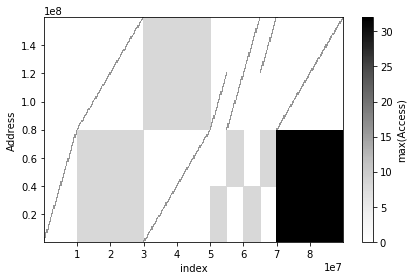

In [12]:
vdf.plot(vdf.index, vdf.Address, what="max(Access)", colormap=plt.get_cmap('Greys'))

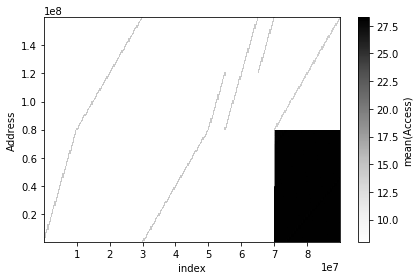

In [14]:
vdf.plot(vdf.index, vdf.Address, what="mean(Access)", colormap=plt.get_cmap('Greys'))

In [36]:
vdf = vaex.open('trace.hdf5')
vdf['index'] = np.arange(0, vdf.Address.count())
vdf

#,Access,Address,Tag,index
<i style='opacity: 0.6'>0</i>,4,0,0,0
<i style='opacity: 0.6'>1</i>,16,8,0,1
<i style='opacity: 0.6'>2</i>,16,16,0,2
<i style='opacity: 0.6'>3</i>,16,24,0,3
<i style='opacity: 0.6'>4</i>,16,32,0,4
...,...,...,...,...
"<i style='opacity: 0.6'>899,995</i>",16,1617560,1,899995
"<i style='opacity: 0.6'>899,996</i>",8,793560,0,899996
"<i style='opacity: 0.6'>899,997</i>",16,1617568,1,899997
"<i style='opacity: 0.6'>899,998</i>",8,801576,0,899998


In [45]:
vdf.plot_widget(vdf.index, vdf.Address, what="max(Access)", colormap=plt.get_cmap('Greys'))

PlotTemplate(components={'main-widget': VBox(children=(VBox(children=(Figure(axes=[Axis(color='#666', grid_col…

Plot2dDefault(w=None, what='max(Access)', x='index', y='Address', z=None)

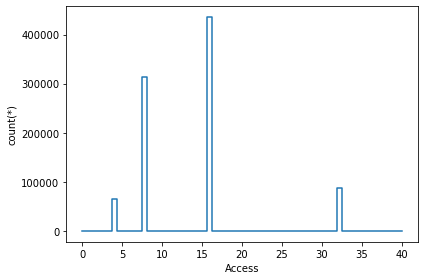

In [38]:
vdf.plot1d(vdf.Access, limits=[0, 40])

In [26]:
[vdf[vdf.Access==x].count() for x in [4, 8, 16, 32]] # block size 8

[array(65050), array(234525), array(434950), array(165475)]

In [31]:
[vdf[vdf.Access==x].count() for x in [4, 8, 16, 32]] # block size 4

[array(65050), array(243900), array(434950), array(156100)]

In [35]:
[vdf[vdf.Access==x].count() for x in [4, 8, 16, 32]] # block size 25

[array(67780), array(228650), array(432220), array(171350)]

In [39]:
[vdf[vdf.Access==x].count() for x in [4, 8, 16, 32]] # block size 100

[array(64550), array(312650), array(435450), array(87350)]

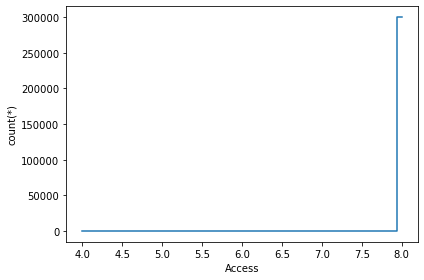

In [54]:
vdf.plot1d(vdf.Access)